<a href="https://colab.research.google.com/github/sruby8/uplift.ai/blob/master/Center_of_Mass_Velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

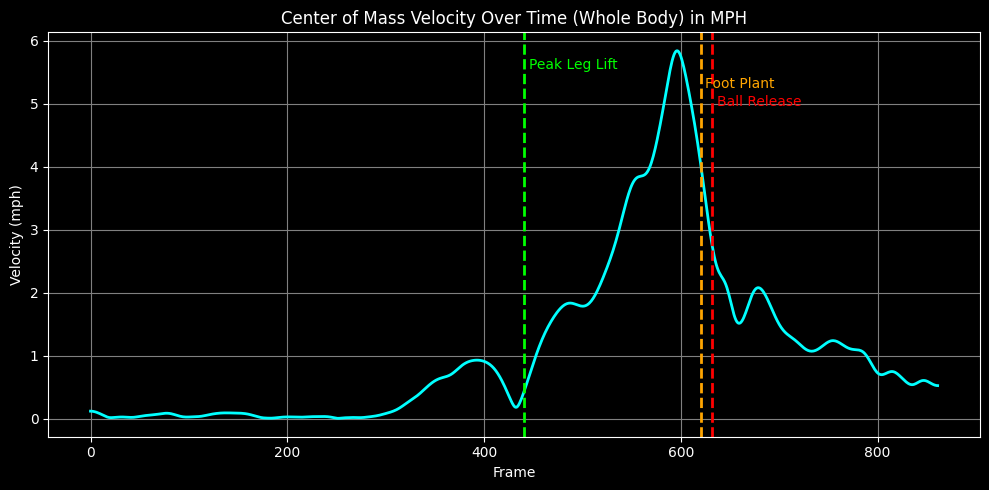

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("uplift_data_export_20250417195302.csv")

# Calculate velocity from whole body COM position data
fps = df['fps'].iloc[0]
dt = 1 / fps

velocity_x = np.gradient(df['whole_body_center_of_mass_x'], dt)
velocity_y = np.gradient(df['whole_body_center_of_mass_y'], dt)
velocity_z = np.gradient(df['whole_body_center_of_mass_z'], dt)

com_velocity_mps = np.sqrt(velocity_x**2 + velocity_y**2 + velocity_z**2)
com_velocity_mph = com_velocity_mps * 2.23694

# Identify event frames
knee_lift_frame_index = df.index[df['max_knee_raise_frame'] == 0].tolist()
foot_plant_frame_index = df.index[df['foot_contact_frame'] == 0].tolist()
release_frame_index = df.index[df['ball_release_frame'] == 0].tolist()

knee_lift_frame = knee_lift_frame_index[0] if knee_lift_frame_index else None
foot_plant_frame = foot_plant_frame_index[0] if foot_plant_frame_index else None
release_frame = release_frame_index[0] if release_frame_index else None

# Plot in dark mode
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
plt.plot(com_velocity_mph, label='COM Velocity (mph)', linewidth=2, color='cyan')

if knee_lift_frame is not None:
    plt.axvline(x=knee_lift_frame, color='lime', linestyle='--', linewidth=2)
    plt.text(knee_lift_frame + 5, max(com_velocity_mph) * 0.95, 'Peak Leg Lift', color='lime')

if foot_plant_frame is not None:
    plt.axvline(x=foot_plant_frame, color='orange', linestyle='--', linewidth=2)
    plt.text(foot_plant_frame + 5, max(com_velocity_mph) * 0.9, 'Foot Plant', color='orange')

if release_frame is not None:
    plt.axvline(x=release_frame, color='red', linestyle='--', linewidth=2)
    plt.text(release_frame + 5, max(com_velocity_mph) * 0.85, 'Ball Release', color='red')

plt.title('Center of Mass Velocity Over Time (Whole Body) in MPH', color='white')
plt.xlabel('Frame', color='white')
plt.ylabel('Velocity (mph)', color='white')
plt.grid(True, color='gray')
plt.tick_params(colors='white')
plt.tight_layout()
plt.show()